In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import scipy.linalg as sl
import scipy.integrate as si

In [2]:
# produce spatial grid vector that uses 2J+1 points to cover interval [-L, L]
def xi(J, L):
    h = L/J
    xivec = np.arange(-J, J+1)*h
    return xivec

In [3]:
# function we'd like to approximate
def f(x):
    return (x**2 - 36.0)**2 / 10000.0

In [4]:
# Gaussian centered at grid point j*h with shape parameter alpha
# x can be a vector
def phiv(x, j, h, alpha):
    return np.exp(-alpha * (x - j*h)**2)

# matricized version
def phim(x, alpha):
    return np.exp(-alpha * x**2)

In [5]:
# compute L2 error when we use 2J+1 points to approximate f(x)
def error(J, L, alpha):
    h = L/J;
    xivec = xi(J, L)
    
    # form Gaussian approximation matrix
    
    # OLD WAY
    # gmat = np.zeros((2*J+1, 2*J+1))
    # for j in range(-J, J+1):
    #     gmat[j + J, :] = phiv(xivec, j, h, alpha)
    
    # NEW WAY
    xi1, xi2 = np.meshgrid(xivec, xivec)
    gmat = phim(xi1 - xi2, alpha)
    
    # form function vector
    fvec = f(xivec)
    
    # solve for coefficients
    beta = sl.solve(gmat, fvec, assume_a='sym')
    
    # now compute L2 error using quadrature
    # define integrand function
    def integrand(x):
        xm, xim = np.meshgrid(xivec, x)
        thisg = phim(xm - xim, alpha)
        return np.square(thisg @ beta - f(x))
    
    l2errsq, _ = si.quadrature(integrand, -L, L, maxiter=500, tol=1e-12, rtol=1e-12)
    return np.sqrt(l2errsq)
    

In [6]:
jspace = np.arange(5, 80)
lsj = jspace.shape[0]
errvec = np.zeros(lsj)
hvec = np.zeros(lsj)
bigL = 15.0
for i in range(lsj):
    errvec[i] = error(jspace[i], bigL, 1.0)
    hvec[i] = bigL/jspace[i]
    

<ipython-input-5-cd3791d9befb>:21: LinAlgWarning: Ill-conditioned matrix (rcond=6.5401e-17): result may not be accurate.
  beta = sl.solve(gmat, fvec, assume_a='sym')
<ipython-input-5-cd3791d9befb>:21: LinAlgWarning: Ill-conditioned matrix (rcond=1.04629e-17): result may not be accurate.
  beta = sl.solve(gmat, fvec, assume_a='sym')
<ipython-input-5-cd3791d9befb>:21: LinAlgWarning: Ill-conditioned matrix (rcond=1.16705e-19): result may not be accurate.
  beta = sl.solve(gmat, fvec, assume_a='sym')
<ipython-input-5-cd3791d9befb>:21: LinAlgWarning: Ill-conditioned matrix (rcond=2.06279e-18): result may not be accurate.
  beta = sl.solve(gmat, fvec, assume_a='sym')
<ipython-input-5-cd3791d9befb>:21: LinAlgWarning: Ill-conditioned matrix (rcond=9.00483e-19): result may not be accurate.
  beta = sl.solve(gmat, fvec, assume_a='sym')
<ipython-input-5-cd3791d9befb>:21: LinAlgWarning: Ill-conditioned matrix (rcond=6.77845e-18): result may not be accurate.
  beta = sl.solve(gmat, fvec, assume_a=

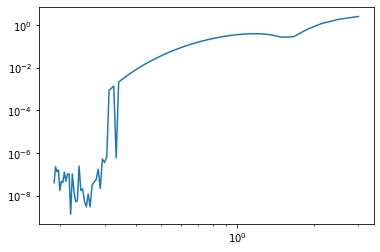

In [7]:
plt.loglog(hvec, errvec)